In [1]:
#load necessary libraries

from matplotlib import test
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

#load dataset
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.head())
print(diabetes.shape)





















   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


In [2]:

#to check missing data
print(diabetes.isnull().sum())
print('.........................................')
#to check no. of classes
print(diabetes.Outcome.value_counts())
print('.......................................')
# Drop zero values
print(diabetes.iloc[:,1:-1].isin([0]).sum())
print('............................................')
# Replace zero values with median
for col in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
 diabetes[col] = diabetes[col].replace({ 0 : diabetes[col].median() })
print(diabetes.iloc[:,1:-3].isin([0]).sum())   

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
.........................................
0    500
1    268
Name: Outcome, dtype: int64
.......................................
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64
............................................
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [3]:
                

x = diabetes.drop("Outcome",axis=1) #feature
y = diabetes[("Outcome")] #target

# Split Data Set In To Train Test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.20,random_state=12)

#feature scaling
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_train = std.fit_transform(xtrain)
std_test = std.fit_transform(xtest)


In [4]:

#logistic regression

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=2000)
log.fit(std_train,ytrain)
train_score = log.score(std_train,ytrain)
test_score = log.score(std_test,ytest)
print('logistic regression train score : ', train_score)
print('logistic regression test score : ', test_score)
print('...........................................................')


logistic regression train score :  0.762214983713355
logistic regression test score :  0.8116883116883117
...........................................................


In [5]:
 
# support vector machine

from sklearn.svm import SVC
diabetes_svm = SVC(kernel = 'linear',C=10)
diabetes_svm.fit(std_train,ytrain)
train_score = diabetes_svm.score(std_train,ytrain)
test_score = diabetes_svm.score(std_test,ytest)
print('svm train score : ', train_score)
print('svm test score : ', test_score)
print('.............................................................')


svm train score :  0.760586319218241
svm test score :  0.8051948051948052
.............................................................


In [6]:

#  k nearest neighbors

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(xtrain,ytrain)
pred = knn.predict(xtest)
test_score = accuracy_score(ytest,pred)
train_pred = knn.predict(xtrain)
train_score = accuracy_score(ytrain,train_pred)
print('knn train score : ',train_score)
print('knn test score : ',test_score)
print('............................................................')


knn train score :  0.8110749185667753
knn test score :  0.6948051948051948
............................................................


In [7]:

# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20,random_state=12)
rf.fit(xtrain,ytrain)
rf_test_score = rf.score(xtest,ytest)
rf_train_score = rf.score(xtrain,ytrain)
print('rf train score : ',rf_train_score)
print('rf test score : ', rf_test_score)
print('.............................................')


rf train score :  0.998371335504886
rf test score :  0.7727272727272727
.............................................


In [8]:

# DecisionTree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
dt_test_score = dt.score(xtest,ytest)
dt_train_score = dt.score(xtrain,ytrain)
print('dt train score : ',dt_train_score)
print('dt test score : ', dt_test_score)
print('...............................................')


dt train score :  1.0
dt test score :  0.7922077922077922
...............................................


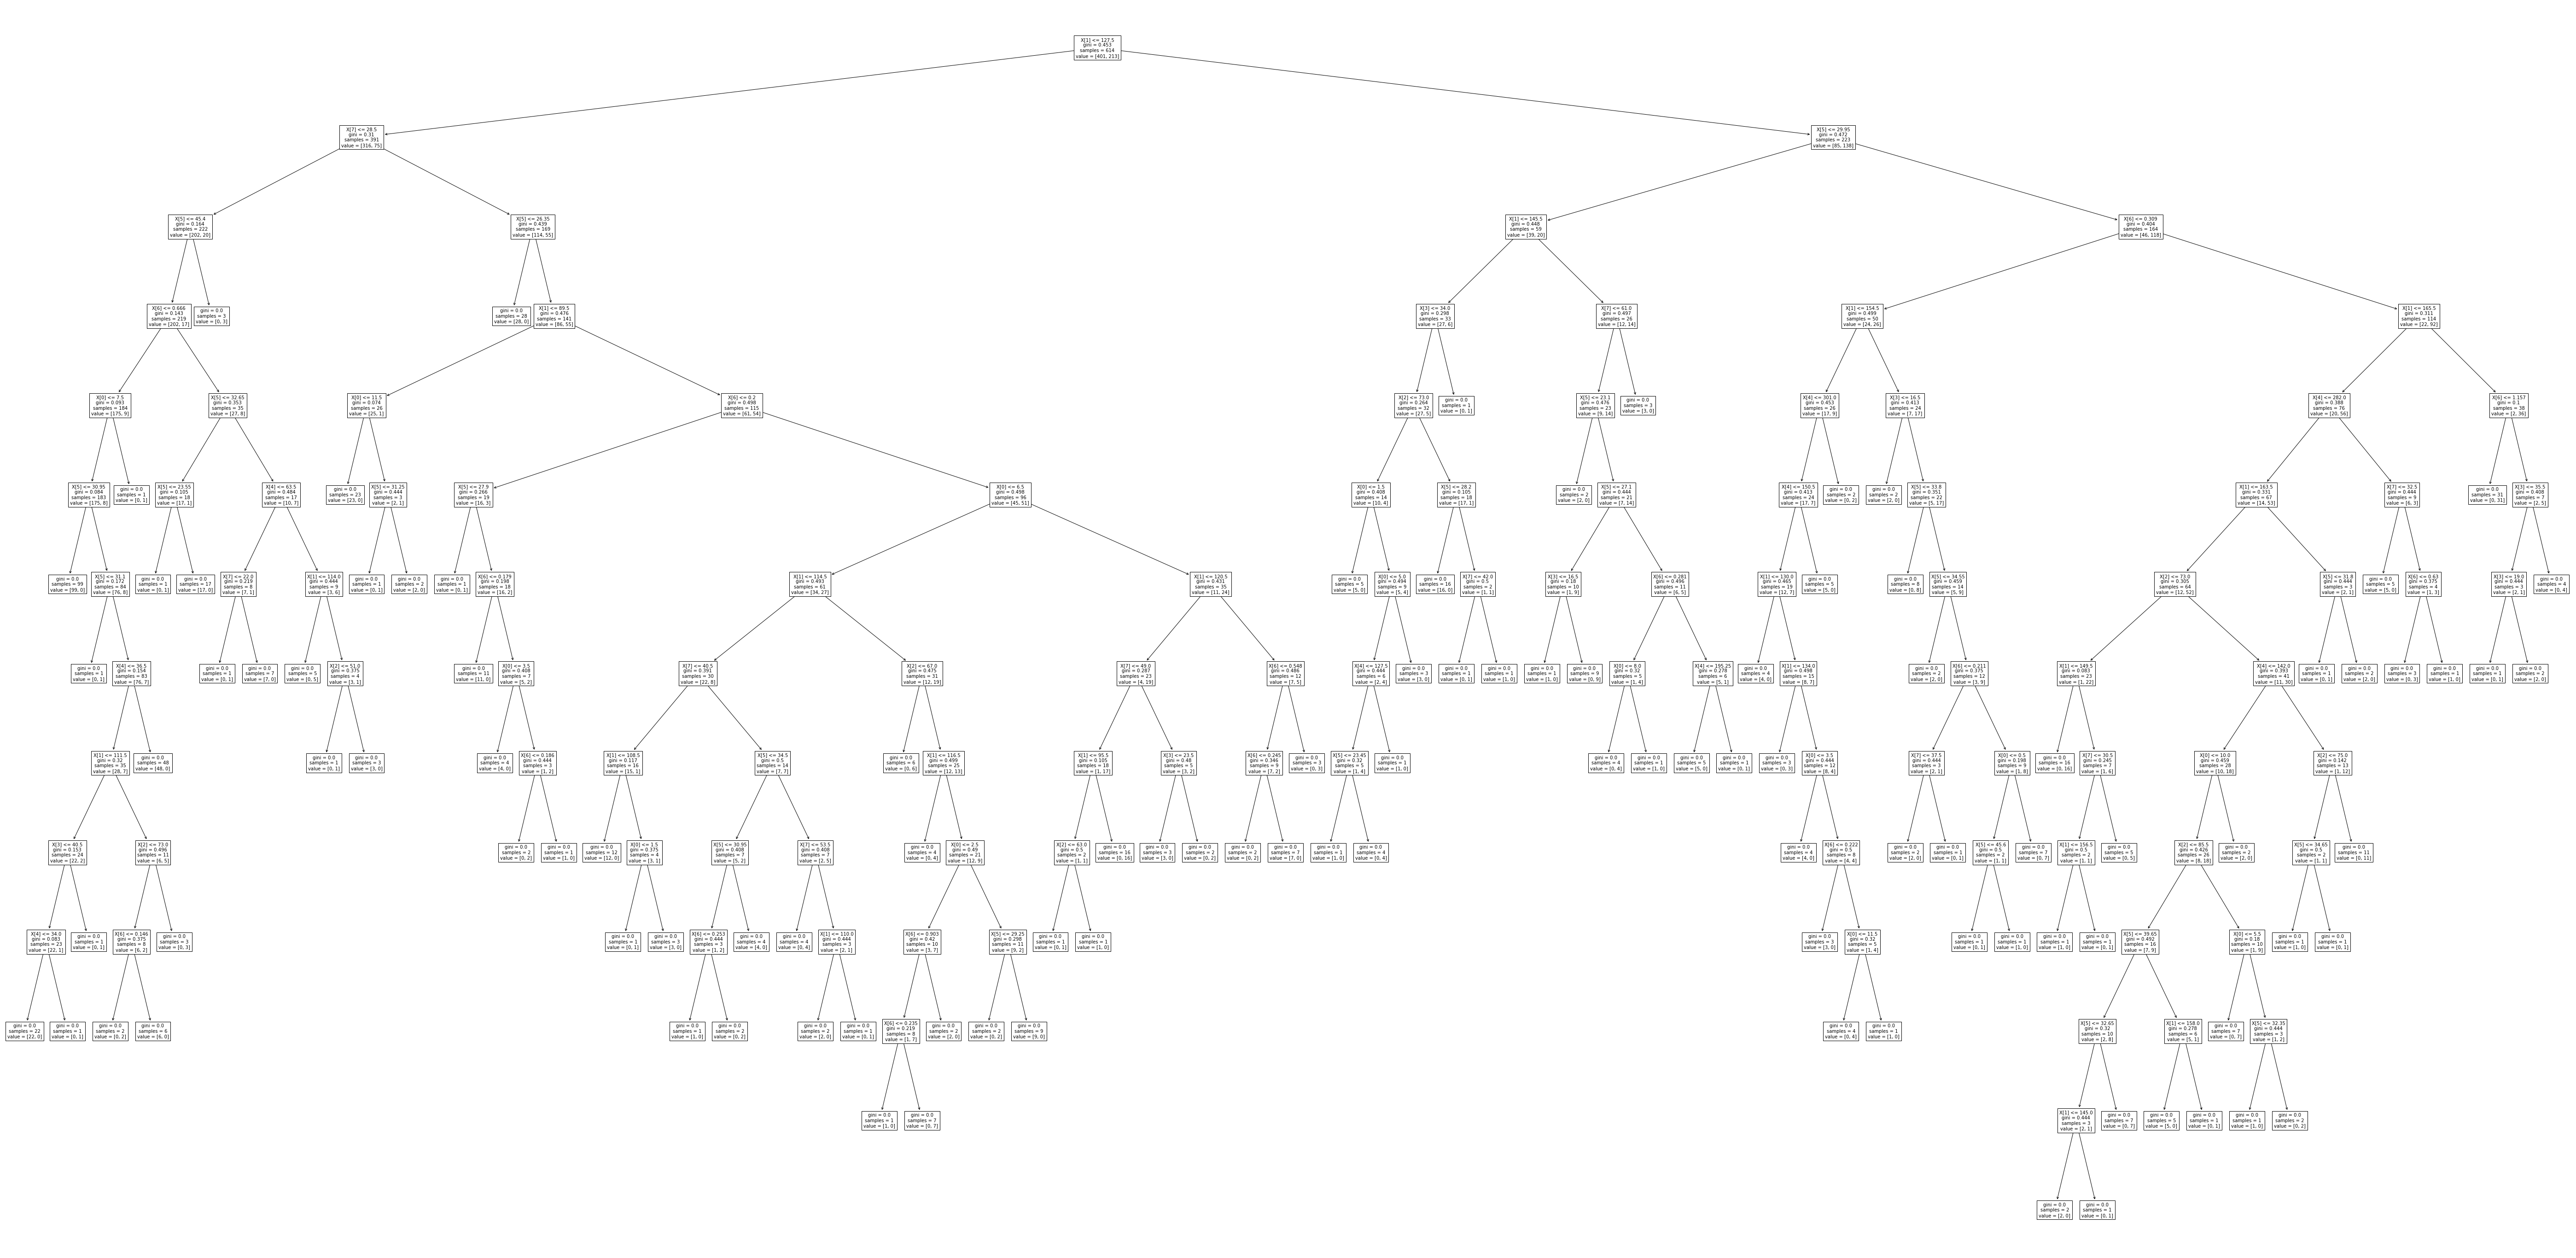

In [9]:
#tree diagram

from sklearn import tree
fig,ax=plt.subplots(figsize=(100,50))
tree.plot_tree(dt,fontsize=10)
plt.show()